# Import libs

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
from fcapy.context import FormalContext
from fcapy.lattice import ConceptLattice
from fcapy.visualizer import LineVizNx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from ucimlrepo import fetch_ucirepo 
plt.rcParams['figure.facecolor'] = (1,1,1,1)

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [6]:
import neural_lib as nl

In [7]:
# Load Titanic dataset from seaborn
titanic = sns.load_dataset('titanic')

# Display the first few rows of the dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
#counting all missed in each columns 
print(titanic.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


**Basic Information:**

- `survived:` Survival status (0 = No, 1 = Yes)<br>
- `pclass:` Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)<br>
- `sex:` Gender<br>
- `age:` Age in years<br>
- `sibsp:` Number of siblings/spouses aboard<br>
- `parch:` Number of parents/children aboard<br>
- `fare:` Passenger fare<br>
- `embarked:` Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)<br>
- `class:` Equivalent to 'pclass'<br>
- `who:` Person's gender and age group ('man', 'woman', 'child')<br>
- `adult_male:` Indicates if the person is an adult male<br>
- `deck:` Deck on which the passenger's cabin is located<br>
- `embark_town:` Town where the passenger boarded the Titanic<br>
- `alive:` Survival status ('yes', 'no')<br>
- `alone:` Indicates if the person was traveling alone<br>

In [9]:
#delete 'age' and 'fare' columns, because there is a large variety of values, 
#delete 'deck' because there is a large number of missed values almost 77% of the dataset.
#and since 'alive' and 'pclass' are equivaled to features 'survived' and 'class' respectively, so i deleted them  
data = titanic.drop(['age', 'alive', 'fare', 'pclass', 'deck'], axis =1)
data.shape

(891, 10)

In [10]:
#delete all missed values 
data.dropna(inplace = True)
print(data.isnull().sum())
data.shape

survived       0
sex            0
sibsp          0
parch          0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alone          0
dtype: int64


(889, 10)

# Step 0. Binarize the data

In [11]:
#split datat into X and target value
# binarize the data
X = pd.get_dummies(data, columns =['sex', 'sibsp', 'parch', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alone'])
y = data['survived']
#convert the binary numerical value to bool
y.replace({0: False, 1: True}, inplace=True)
X.replace({0: False, 1: True}, inplace=True)

y.index = X.index.astype(str)
X.index = X.index.astype(str)

#name the axis of index, which correspond objects 
X= X.rename_axis("Object")
y= y.rename_axis("Object")

# Reset index from 0 to 889
data.reset_index(drop=True, inplace=True)
X

,survived,sex_female,sex_male,sibsp_0,sibsp_1,sibsp_2,sibsp_3,sibsp_4,sibsp_5,sibsp_8,...,who_child,who_man,who_woman,adult_male_False,adult_male_True,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alone_False,alone_True
Object,,,,,,,,,,,,,,,,,,,,,
0,False,False,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,True,False
1,True,True,False,False,True,False,False,False,False,False,...,False,False,True,True,False,True,False,False,True,False
2,True,True,False,True,False,False,False,False,False,False,...,False,False,True,True,False,False,False,True,False,True
3,True,True,False,False,True,False,False,False,False,False,...,False,False,True,True,False,False,False,True,True,False
4,False,False,True,True,False,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,True,True,False,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,True
887,True,True,False,True,False,False,False,False,False,False,...,False,False,True,True,False,False,False,True,False,True
888,False,True,False,False,True,False,False,False,False,False,...,False,False,True,True,False,False,False,True,True,False


Split the data to train and test

In [12]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(711, 33)

## Step 1. Build Monotone Concept Lattice

Put binarized data in FormalContext and compute monotone ConceptLattice

In [13]:
K_train = FormalContext.from_pandas(X_train)

K_train

FormalContext (711 objects, 33 attributes, 6670 connections)
   |survived|sex_female|sex_male|sibsp_0|sibsp_1|...|embark_town_Cherbourg|embark_town_Queenstown|embark_town_Southampton|alone_False|alone_True|
708|       X|         X|        |      X|       |...|                     |                      |                      X|           |         X|
240|        |         X|        |       |      X|...|                    X|                      |                       |          X|          |
382|        |          |       X|      X|       |...|                     |                      |                      X|           |         X|
792|        |         X|        |       |       |...|                     |                      |                      X|          X|          |
683|        |          |       X|       |       |...|                     |                      |                      X|          X|          |
119|        |         X|        |       |       |...|          

In [14]:
L = ConceptLattice.from_context(K_train, algo='Sofia', is_monotone=True)

Compute F1 score for each formal concept  (assuming that an object is predicted True if it is in the extent of the concept)

In [15]:
from sklearn.metrics import f1_score

for c in L:
    y_preds = np.zeros(K_train.n_objects)
    y_preds[list(c.extent_i)] = 1
    c.measures['f1_score'] = f1_score(y_train, y_preds)

Select indices of the best concepts from the lattice

In [16]:
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:28])

assert len({g_i for c in L[best_concepts] for g_i in c.extent_i})==K_train.n_objects, "Selected concepts do not cover all train objects"

Construct neural network based on concept lattice

In [17]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))

Setup visuzalier for the architecture

In [18]:
#vis = LineVizNx(node_label_font_size=15, node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n\n')
vis = LineVizNx(node_label_font_size=0, node_label_func=lambda el_i, P: '', flg_node_indices=False)

Move the nodes in visualization to make it look pretty

#### various techniques to select best features from the concept lattice

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
chi2_features = SelectKBest(chi2)
x_kbest_features = chi2_features.fit_transform(X_train, y_train)
x_kbest_features_int = x_kbest_features.astype(int)
x_kbest_features

array([[ True,  True, False, ...,  True, False, False],
       [False,  True, False, ...,  True, False,  True],
       [False, False,  True, ..., False,  True, False],
       ...,
       [ True,  True, False, ...,  True, False, False],
       [False,  True, False, ...,  True, False, False],
       [False, False,  True, ..., False,  True, False]])

In [24]:
# Get the selected feature indices
selected_feature_indices = chi2_features.get_support(indices=True)

# Get the names of the selected columns
selected_column_names = X_train.columns[selected_feature_indices]
for i in range(len(selected_column_names)):
    print(" feature with column_index {:} = {:}".format(selected_feature_indices[i], selected_column_names[i]))
print(type(selected_column_names))

 feature with column_index 0 = survived
 feature with column_index 1 = sex_female
 feature with column_index 2 = sex_male
 feature with column_index 20 = class_First
 feature with column_index 22 = class_Third
 feature with column_index 24 = who_man
 feature with column_index 25 = who_woman
 feature with column_index 26 = adult_male_False
 feature with column_index 27 = adult_male_True
 feature with column_index 28 = embark_town_Cherbourg
<class 'pandas.core.indexes.base.Index'>


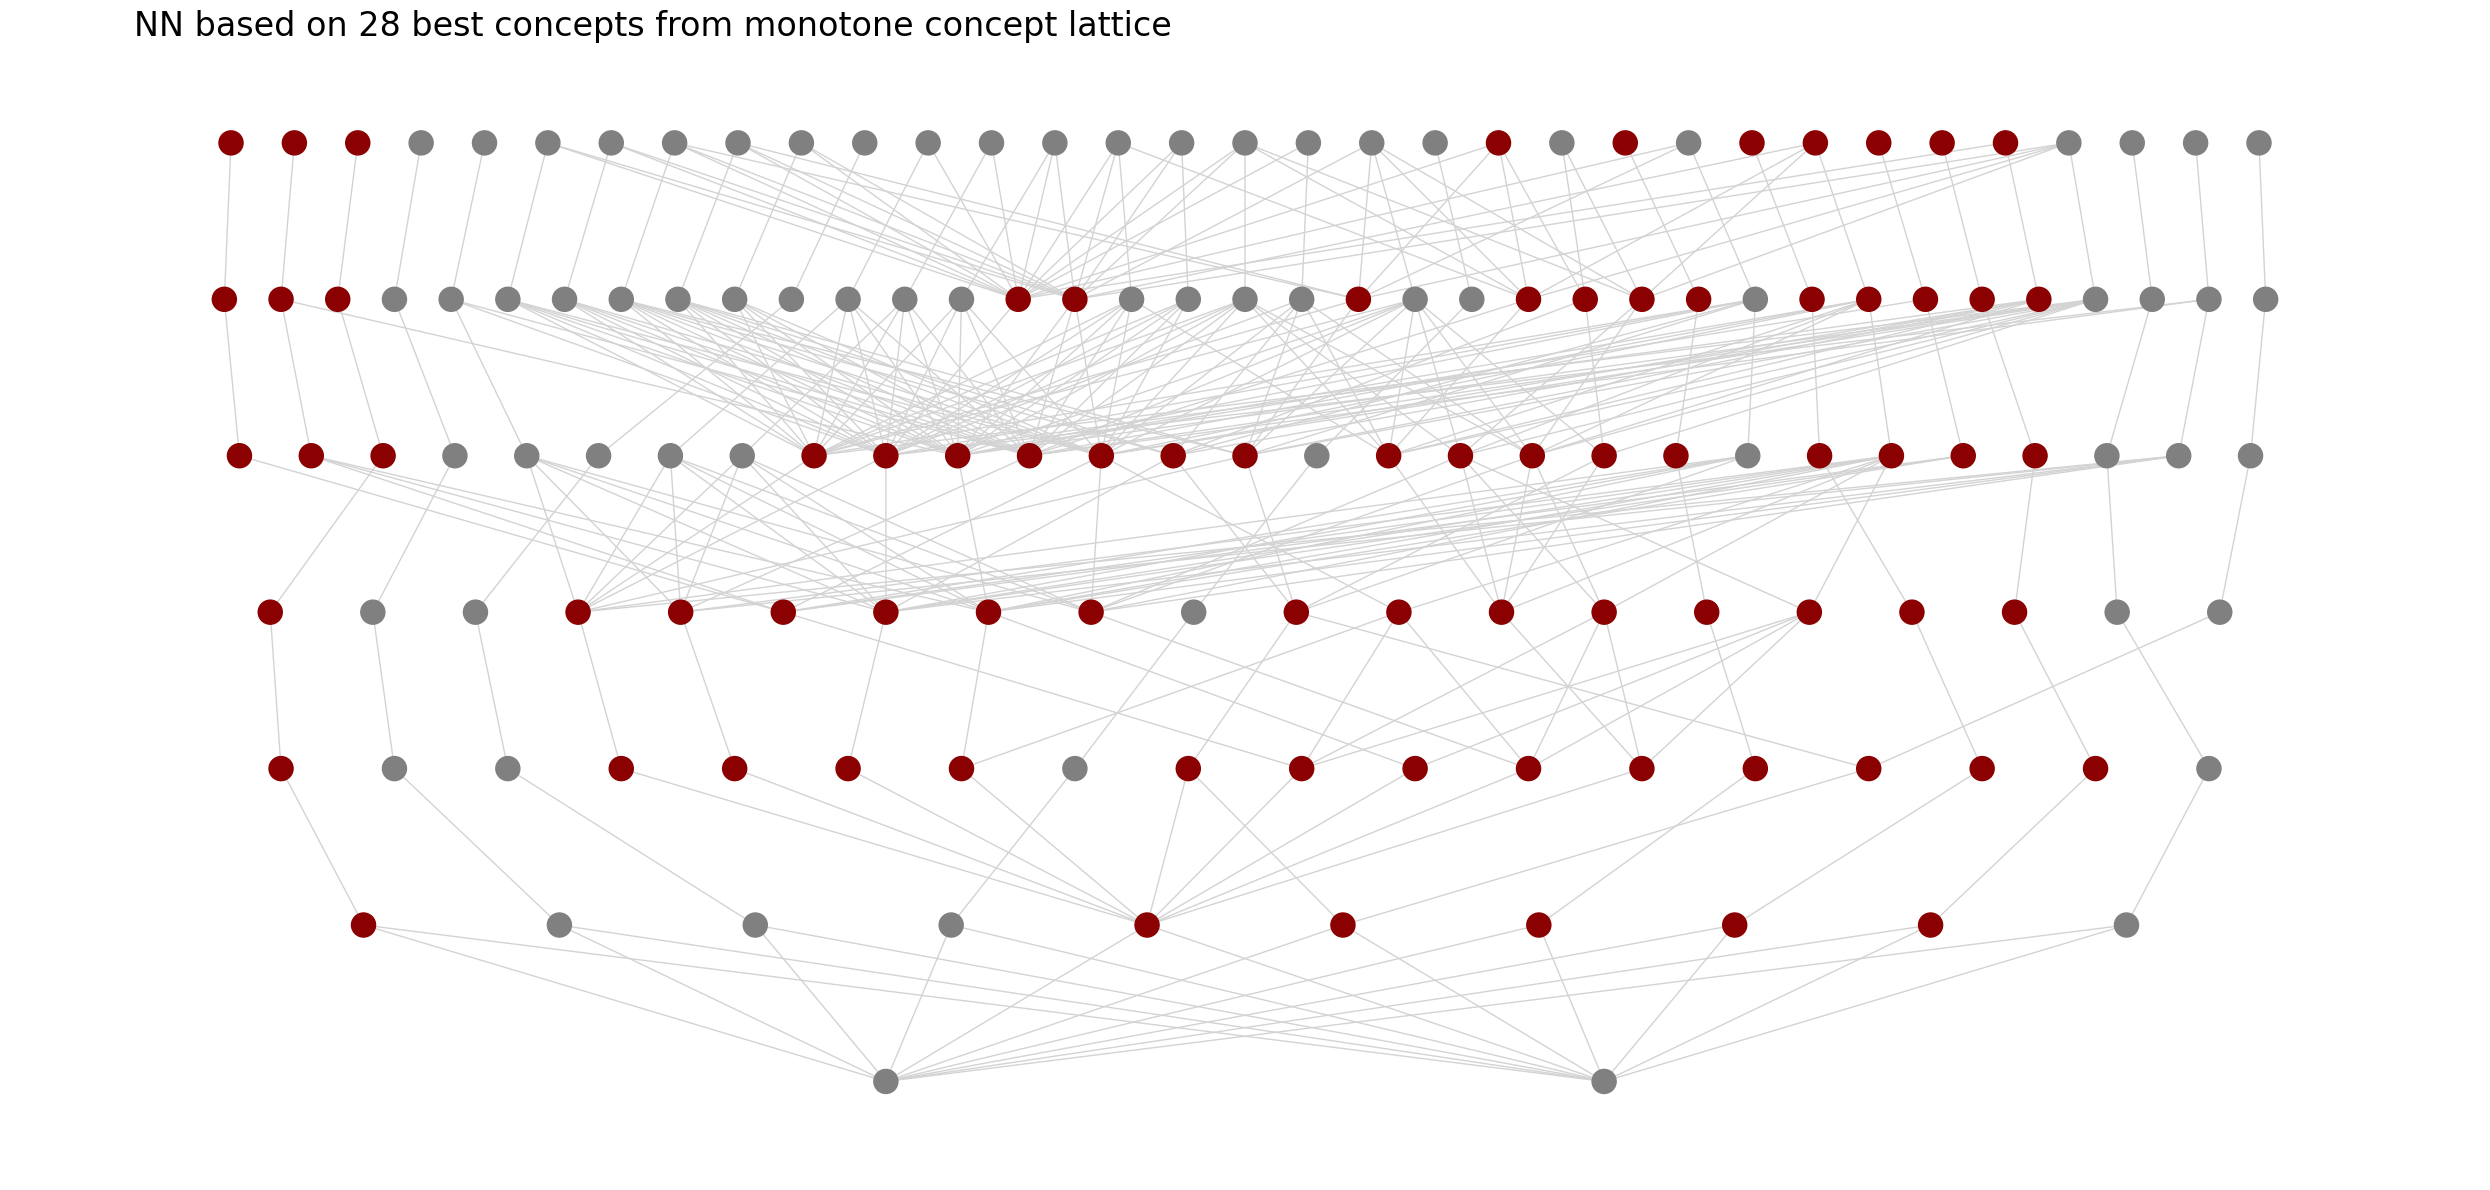

('survived',
 'sex_female',
 'sex_male',
 'sibsp_0',
 'sibsp_1',
 'sibsp_2',
 'sibsp_3',
 'sibsp_4',
 'sibsp_5',
 'sibsp_8',
 'parch_0',
 'parch_1',
 'parch_2',
 'parch_3',
 'parch_4',
 'parch_5',
 'parch_6',
 'embarked_C',
 'embarked_Q',
 'embarked_S',
 'class_First',
 'class_Second',
 'class_Third',
 'who_child',
 'who_man',
 'who_woman',
 'adult_male_False',
 'adult_male_True',
 'embark_town_Cherbourg',
 'embark_town_Queenstown',
 'embark_town_Southampton',
 'alone_False',
 'alone_True')

In [25]:
# Create a new ConceptNetwork with feature attributes
cn_with_features = nl.ConceptNetwork(poset=cn.poset, attributes=selected_column_names)

# Visualize the ConceptNetwork with selected features
vis = LineVizNx(node_label_font_size=0, node_label_func=lambda el_i, P: '', flg_node_indices=False)

selected_column_names_class = set(selected_column_names)
traced = cn_with_features.trace_description(selected_column_names_class , include_targets=False)

fig, ax = plt.subplots(figsize=(25, 12))
vis.draw_poset(
    cn_with_features.poset, ax=ax,
    flg_node_indices=False,
    flg_node_labels=False,
    node_color=['darkred' if el_i in traced else 'gray' for el_i in range(len(cn_with_features.poset))]
)

plt.title(f'NN based on 28 best concepts from monotone concept lattice', loc='left', x=0.05, size=24)
plt.subplots_adjust()
plt.tight_layout()
plt.show()
cn.attributes
#concerning the last level(target value), the left one is "False", and the right one is "True" 

In [139]:
cn_with_features.poset

In [26]:
cn.fit(X_train, y_train)

In [27]:
print('Class prediction', cn.predict(X_test).numpy())
print('Class prediction with probabilities', cn.predict_proba(X_test).detach().numpy())
print('True class', y_test.values)

Class prediction [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Class prediction with probabilities [[0.74232787 0.25767216]
 [0.74232787 0.25767216]
 [0.74232787 0.25767216]
 [0.74232787 0.25767216]
 [0.74232787 0.25767216]
 [0.74232787 0.25767216]
 [0.74232787 0.25767216]
 [0.74232787 0.25767216]
 [0.74232787 0.25767216]
 [0.74232787 0.25767216]
 [0.74232787 0.25767216]
 [0.74232787 0.25767216]
 [0.74232787 0.25767216]
 [0.74232787 0.25767216]
 [0.74232787 0.25767216]
 [0.74232787 0.25767216]
 [0.74232787 0.25767216]
 [0.74232787 0.25767216]
 [0.74232787 0.25767216]
 [0.74232787 0.25767216]
 [0.74232787 0.25767216]
 [0.74232787 0.25767216]
 [0.74232787 0.25767216]
 [0.742327

In [28]:
edge_weights = cn.edge_weights_from_network()

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sparselinear\sparselinear.py:301: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:607.)
  weight = torch.sparse.FloatTensor(self.indices, self.weights, (self.out_features, self.in_features))


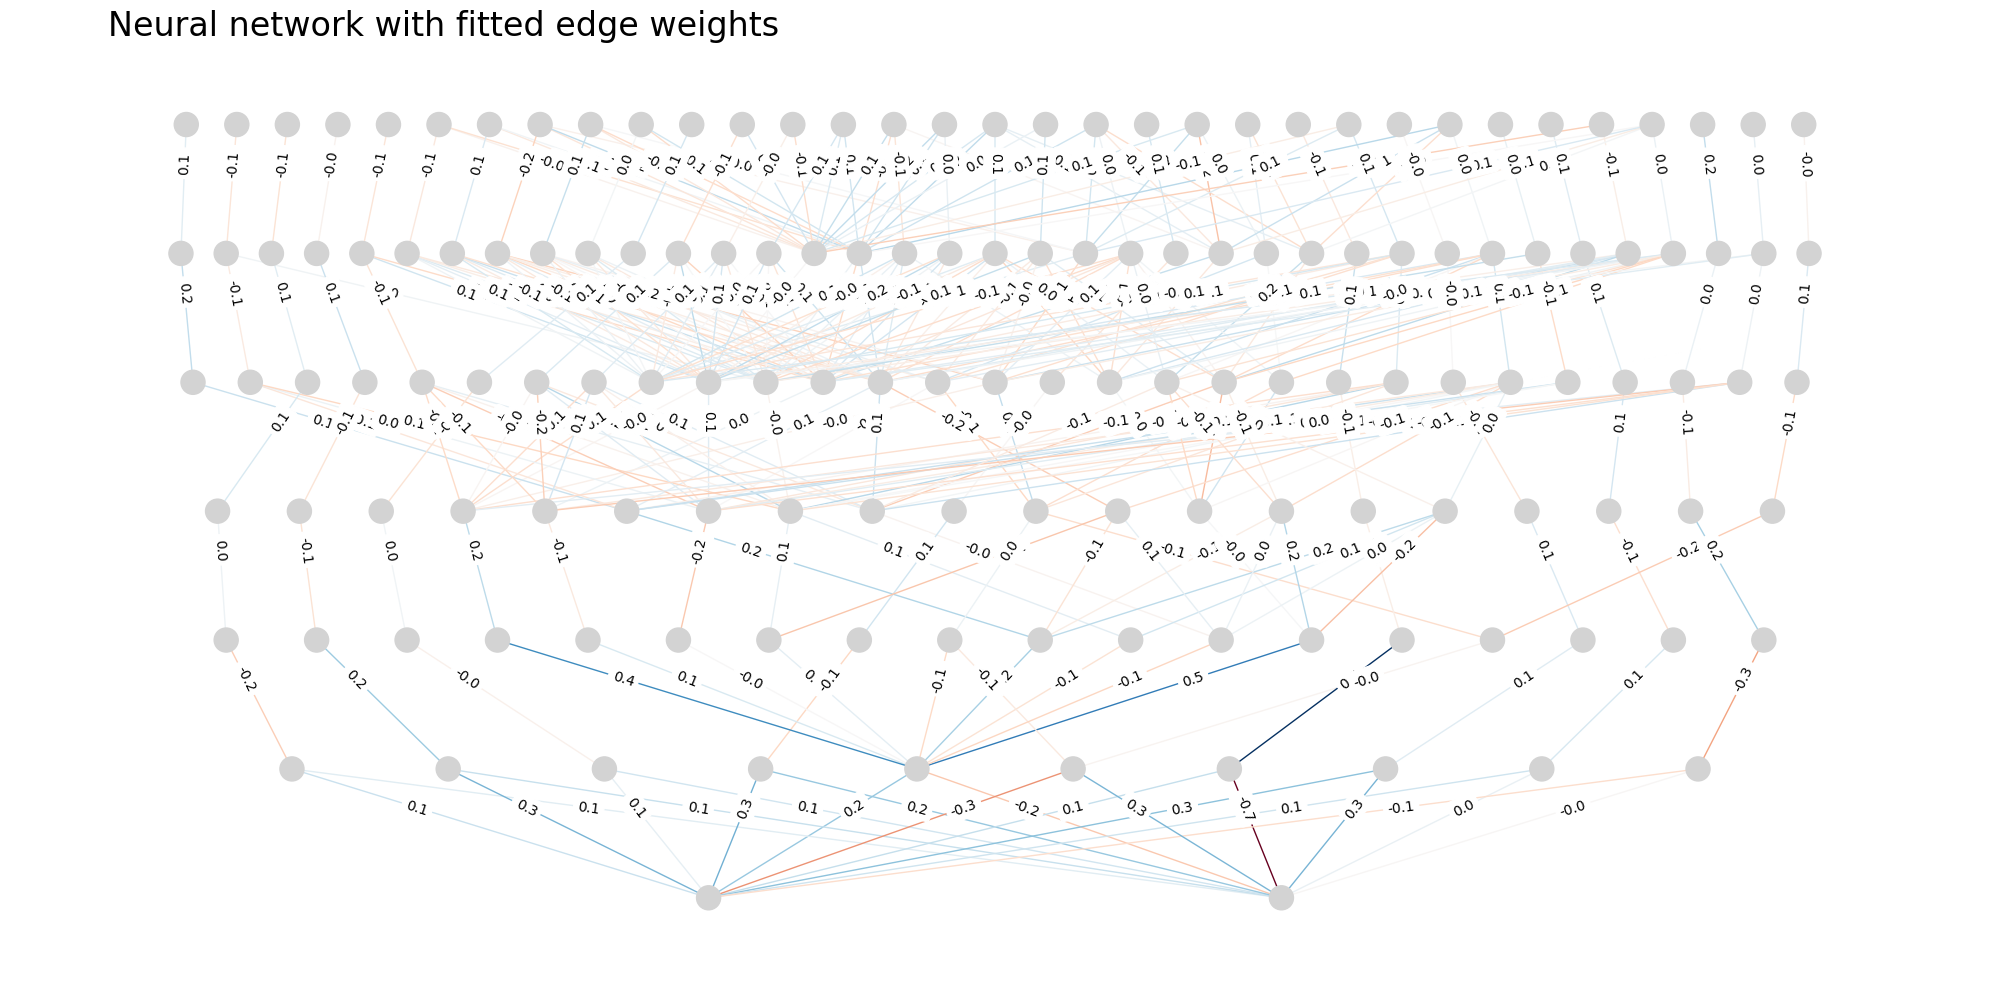

In [29]:
import networkx as nx

fig, ax = plt.subplots(figsize=(20,10))

vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    
    edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
    edge_cmap=plt.cm.RdBu,
)
nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

plt.title('Neural network with fitted edge weights', size=24, x=0.05, loc='left')
plt.tight_layout()
plt.subplots_adjust()
plt.savefig('fitted_network.png')
plt.show()

In [49]:
final_y_test_str = y_test.astype(str)

# Initialize classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'k-NN': KNeighborsClassifier(n_neighbors=3),
    'CatBoost': CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, random_state=42, verbose=0),
    'Logistic Regression': LogisticRegression(random_state=42, multi_class='ovr', max_iter=10000)
}

# Initialize empty dictionaries to store results
accuracies = {}
f1_scores = {}

# Perform cross-validation and parameter tuning for each classifier
for name, clf in classifiers.items():
    print(f"Training {name} Classifier...")
    
    if name == 'Decision Tree':
        # Define the parameter grid for Decision Tree
        param_grid = {
            'max_depth': [3, 4, 5, 6, 7],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    elif name == 'Random Forest':
        # Define the parameter grid for Random Forest
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 4, 5, 6, 7],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    elif name == 'k-NN':
        # Define the parameter grid for k-NN
        param_grid = {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    else:
        param_grid = {}  # No parameter tuning for other classifiers
    
    # Create GridSearchCV with 5-fold cross-validation
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    
    # Train the classifier using GridSearchCV
    grid_search.fit(X_train, y_train)
    
    # Get the best parameters and estimator from GridSearchCV
    best_params = grid_search.best_params_
    best_clf = grid_search.best_estimator_
    
    # Make predictions using the best classifier
    y_pred = best_clf.predict(X_test)
    y_pred_str = y_pred.astype(str)
    
    # Calculate accuracy and F1-score
    accuracy = accuracy_score(final_y_test_str, y_pred_str)
    f1 = f1_score(final_y_test_str, y_pred_str, average='weighted', zero_division=1)
    
    # Store results in dictionaries
    accuracies[name] = accuracy
    f1_scores[name] = f1
    
    # Display the results for the current classifier
  
    print(classification_report(final_y_test_str, y_pred_str))
    print("-" * 40)

Training Decision Tree Classifier...
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       109
        True       1.00      1.00      1.00        69

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178

----------------------------------------
Training Random Forest Classifier...
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       109
        True       1.00      1.00      1.00        69

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178

----------------------------------------
Training Naive Bayes Classifier...
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       109
        True       1.00      1.00      1.00   

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [       nan 0.97748449        nan 0.97467744        nan 0.97327883]
  warnings.warn(


              precision    recall  f1-score   support

       False       1.00      0.94      0.97       109
        True       0.92      1.00      0.96        69

    accuracy                           0.97       178
   macro avg       0.96      0.97      0.97       178
weighted avg       0.97      0.97      0.97       178

----------------------------------------
Training CatBoost Classifier...


c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


              precision    recall  f1-score   support

       False       1.00      1.00      1.00       109
        True       1.00      1.00      1.00        69

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178

----------------------------------------
Training Logistic Regression Classifier...
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       109
        True       1.00      1.00      1.00        69

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178

----------------------------------------


In [50]:
# Initialize the XGBoost classifier 
xgb_classifier = XGBClassifier(
    random_state=42,
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3
)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display results
print("Accuracy:", accuracy)
print(f"F1-score: {f1}")
print("Classification Report:")
print(classification_rep)


Accuracy: 1.0
F1-score: 1.0
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       109
        True       1.00      1.00      1.00        69

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



In [51]:
# Display the overall performance of all classifiers
print("Overall Performance:\n")
for name in classifiers.keys():
    print(f"{name} - Accuracy: {accuracies[name]:.4f}, F1 Score: {f1_scores[name]:.4f}")
    print("-" * 50)
    
print(f"XGBoost - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")
print("-" * 50)

accuracy_FCA = accuracy_score( y_test.values, cn.predict(X_test).numpy())
f1_FCA = f1_score( y_test.values, cn.predict(X_test).numpy(), average='weighted', zero_division=1)
print(f"Neural_FCA - Accuracy: {accuracy_FCA:.4f}, F1 Score: {f1_FCA:.4f}")

Overall Performance:

Decision Tree - Accuracy: 1.0000, F1 Score: 1.0000
--------------------------------------------------
Random Forest - Accuracy: 1.0000, F1 Score: 1.0000
--------------------------------------------------
Naive Bayes - Accuracy: 1.0000, F1 Score: 1.0000
--------------------------------------------------
k-NN - Accuracy: 0.9663, F1 Score: 0.9665
--------------------------------------------------
CatBoost - Accuracy: 1.0000, F1 Score: 1.0000
--------------------------------------------------
Logistic Regression - Accuracy: 1.0000, F1 Score: 1.0000
--------------------------------------------------
XGBoost - Accuracy: 1.0000, F1 Score: 1.0000
--------------------------------------------------
Neural_FCA - Accuracy: 0.6124, F1 Score: 0.4651
